Found the root near -0.1997 (actual value: -0.19921875)
+-------------+-------------+-------------+----------------+--------------------+-------------+
|      i      |     X_L     |     X_u     |       X_m      |     F(X_m)F(X_L)   |    E_a (%)  |
+-------------+-------------+-------------+----------------+--------------------+-------------+
|      0      | -1.0000     | 0.0000      | -0.5000        | 35.9375            | _           |
|      1      | -0.5000     | 0.0000      | -0.2500        | 1.5823             | 100.00      |
|      2      | -0.2500     | 0.0000      | -0.1250        | -0.3796            | 100.00      |
|      3      | -0.2500     | -0.1250     | -0.1875        | -0.0623            | 33.33       |
|      4      | -0.2500     | -0.1875     | -0.2188        | 0.0968             | 14.29       |
|      5      | -0.2188     | -0.1875     | -0.2031        | 0.0065             | 7.69        |
|      6      | -0.2031     | -0.1875     | -0.1953        | -0.0015            

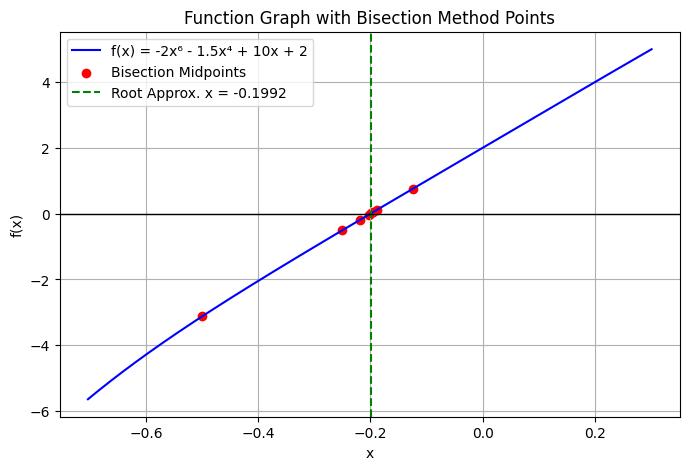

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (-2 * x ** 6) - (1.5 * x ** 4) + (10 * x) + 2

X_L = float(input("| Enter X_L (Lower Bound): "))
X_u = float(input("| Enter X_U (Upper Bound): "))

# Initializes the variables of the method.
bisection_result = []
x_m_prev = None
x_m_values = []
iteration = 0
e_a = 100
limit = 2.0

# Check if initial bounds are appropriate for finding a root.
f_xl = -2 * X_L**6 - 1.5 * X_L**4 + 10 * X_L + 2
f_xu = -2 * X_u**6 - 1.5 * X_u**4 + 10 * X_u + 2

# Verify that there's a sign change between bounds. 
if f_xl * f_xu > 0:
    
    # If no sign change, print warning but continue anyway.
    print(f"Warning: Function may not have a root in the interval [{X_L}, {X_u}] or may have an even number of roots.")
    print(f"f({X_L}) = {f_xl} and f({X_u}) = {f_xu}")
    
    # Try to adjust bounds to find a root if possible.
    # For finding -0.1997 root.
    if -1 < X_L < 0 and 0 < X_u < 2:
        if X_L > -0.5:
            X_L = -0.5
            print(f"Adjusted X_L to {X_L} to find root near -0.1997")
        if X_u < 0:
            X_u = 0
            print(f"Adjusted X_u to {X_u} to find root near -0.1997")
    
    # For finding 1.32 root.
    elif 0 < X_L < 2 and 1 < X_u < 3:
        if X_L > 1:
            X_L = 1
            print(f"Adjusted X_L to {X_L} to find root near 1.32")
        if X_u < 1.5:
            X_u = 1.5
            print(f"Adjusted X_u to {X_u} to find root near 1.32")

while e_a >= limit:
    # Calculations.
    x_m = (X_L + X_u) / 2
    f_xm = -2 * x_m**6 - 1.5 * x_m**4 + 10 * x_m + 2
    f_xl = -2 * X_L**6 - 1.5 * X_L**4 + 10 * X_L + 2
    f_xlxm = f_xm * f_xl

    if x_m_prev is not None:
        e_a = abs((x_m - x_m_prev) / x_m) * 100  

    bisection_result.append({
        'iteration': iteration, 
        'X_L': X_L, 
        'X_u': X_u, 
        'X_m': x_m, 
        'f_xlxm': f_xlxm, 
        'e_a': e_a if iteration > 0 else "_"
    })

    if f_xlxm < 0:
        X_u = x_m
    else:
        X_L = x_m

    x_m_values.append(x_m)
    
    x_m_prev = x_m
    iteration += 1
    
    # Prevent infinite loops with a reasonable maximum iteration limit.
    if iteration > 100:
        print("Maximum iterations reached. Solution may not have converged to desired accuracy.")
        break

# At the end, print which root we likely found.
final_x = x_m_values[-1]
if abs(final_x + 0.1997) < 0.05:
    print(f"Found the root near -0.1997 (actual value: {final_x})")
elif abs(final_x - 1.32) < 0.05:
    print(f"Found the root near 1.32 (actual value: {final_x})")
else:
    print(f"Found a root at {final_x}, which is not close to the expected values of -0.1997 or 1.32.")

x = np.linspace(X_L - 0.5, X_u + 0.5, 400)  
y = f(x)

# Prints the results.
print("+-------------+-------------+-------------+----------------+--------------------+-------------+")
print("|      i      |     X_L     |     X_u     |       X_m      |     F(X_m)F(X_L)   |    E_a (%)  |")
print("+-------------+-------------+-------------+----------------+--------------------+-------------+")

# Gets the results from the index of bisection: bisection_results = [].
for result in bisection_result:
    e_a_str = f"{result['e_a']:.2f}" if isinstance(result['e_a'], float) else result['e_a']
    
    print(f"|      {result['iteration']:<6} | {result['X_L']:<11.4f} | {result['X_u']:<11.4f} | "
            f"{result['X_m']:<14.4f} | {result['f_xlxm']:<18.4f} | {e_a_str:<11} |")

print("+-------------+-------------+-------------+----------------+--------------------+-------------+")
print(f"Root Approximation: {result['X_m']:.4f}")
print(f"Root Found Nearly: {e_a_str} %")

# Plots the method itself.
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="f(x) = -2x⁶ - 1.5x⁴ + 10x + 2", color='b')
plt.scatter(x_m_values, f(np.array(x_m_values)), color='r', marker='o', label="Bisection Midpoints")

# Highlights the roots.
final_xm = x_m_values[-1]
plt.axvline(final_xm, color='g', linestyle="--", label=f"Root Approx. x = {final_xm:.4f}")

# Adds titles, labels, legends, and window title.
plt.gcf().canvas.manager.set_window_title("Bisection Method | Function Plot")
plt.title("Function Graph with Bisection Method Points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.grid()
plt.show()